In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import datetime as dt
from sklearn import tree

In [6]:
data = pd.read_csv(r"D:\Data Science\datasets\yahoo_data.csv")
data['Date']=pd.to_datetime(data['Date'])
#data['Date_val'] = data['Date'].map(dt.datetime.toordinal)
data.drop('Unnamed: 0',inplace=True,axis=1)
data.head()
data.describe()

Date          Open          High  \
count                           1258   1258.000000   1258.000000   
mean   2020-10-28 09:39:12.305246464  29595.823045  29776.945739   
min              2018-05-01 00:00:00  19028.360000  19121.010000   
25%              2019-07-31 06:00:00  26041.267500  26163.155000   
50%              2020-10-27 12:00:00  29201.410000  29335.685000   
75%              2022-01-26 18:00:00  33604.027500  33825.445000   
max              2023-04-28 00:00:00  36722.600000  36952.650000   
std                              NaN   4006.078299   4009.007573   

                Low        Close*   Adj Close**        Volume  
count   1258.000000   1258.000000   1258.000000  1.258000e+03  
mean   29402.432226  29599.361677  29599.361677  3.450636e+08  
min    18213.650000  18591.930000  18591.930000  8.615000e+07  
25%    25877.872500  26027.120000  26027.120000  2.773125e+08  
50%    28996.500000  29199.460000  29199.460000  3.247250e+08  
75%    33346.827500  33600.342500  33600.342500  3.875100e+08  
max    36636.000000  36799.650000  36799.650000  9.159900e+08  
std     4004.949066   4007.468822   4007.468822  1.069142e+08

Description
Date                          The date on which trade occured
Open                              Day's Opening trading price
High                              Day's highest trading price
Low                                Day's lowest trading price
Close*                            Day's Closing trading price
Adj Close**  Day's Closing trading price after adjustustments
Volume         Quantity of stocks sold between open and close

<Axes: >

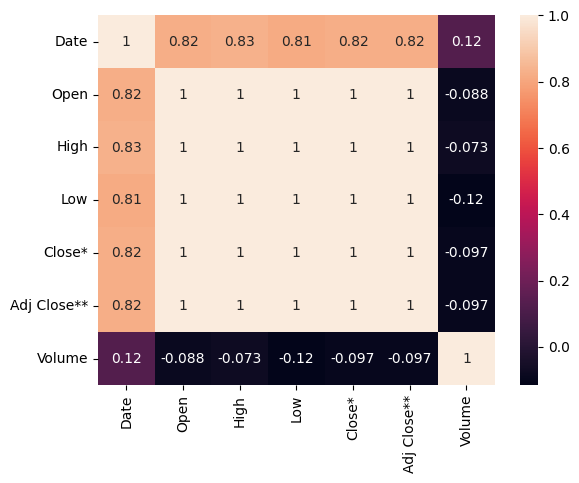

In [3]:
dataset_summary = pd.DataFrame({"Date" : "The date on which trade occured", "Open" : "Day's Opening trading price", "High" : "Day's highest trading price",
                   "Low" : "Day's lowest trading price", "Close*" : "Day's Closing trading price", "Adj Close**" : "Day's Closing trading price after adjustustments",
                   "Volume" : "Quantity of stocks sold between open and close"},index=["Description"])
display(pd.DataFrame.transpose(dataset_summary))
sns.heatmap(data.corr(),annot=True)

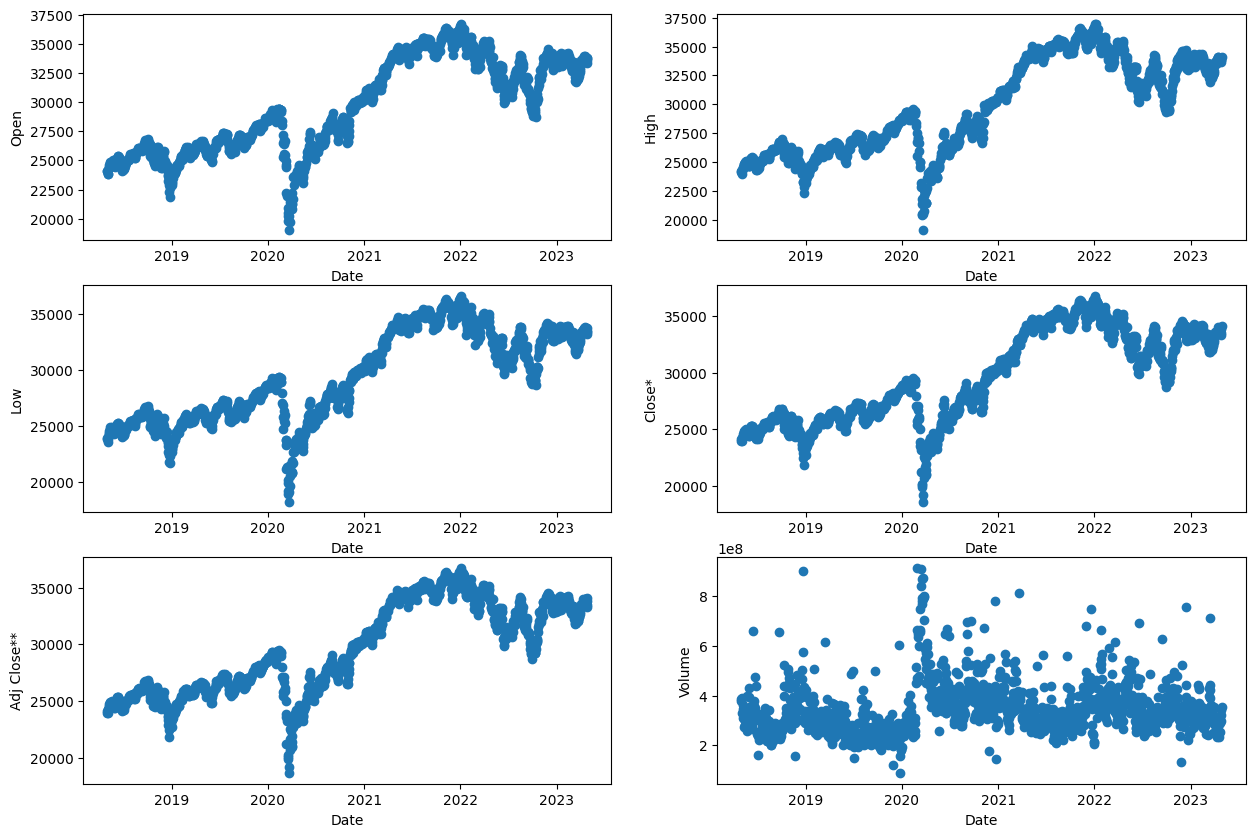

In [4]:
fig = plt.figure(figsize=(15,10))

for i in range(1,len(data.columns)):
    plt.subplot(3,2,i)
    plt.scatter(data['Date'],data[data.columns[i]])
    plt.xlabel('Date')
    plt.ylabel(data.columns[i])
plt.show()

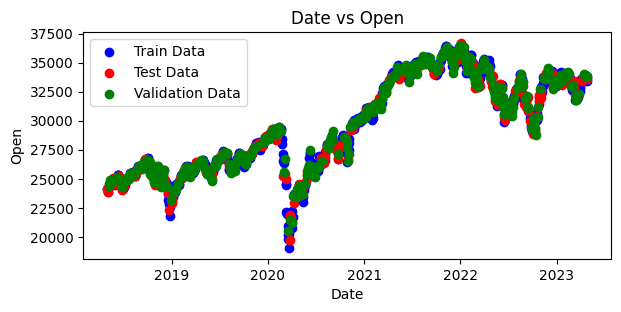

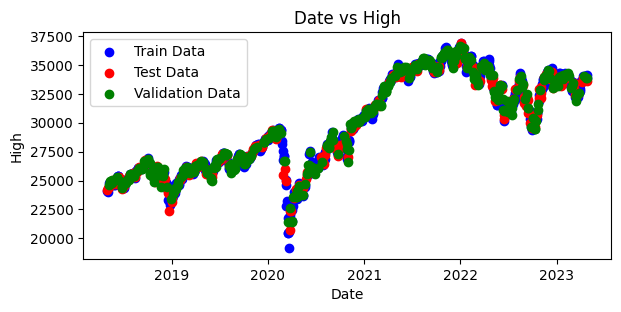

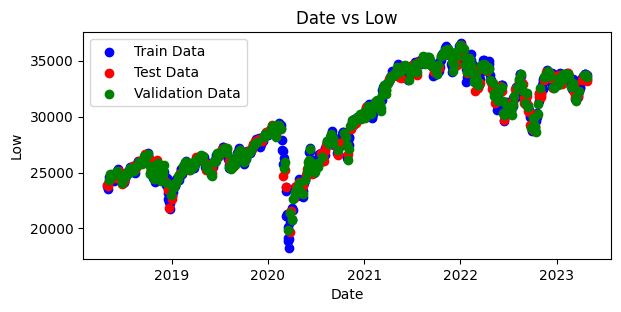

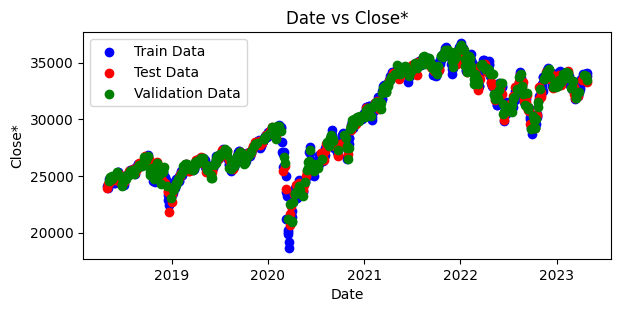

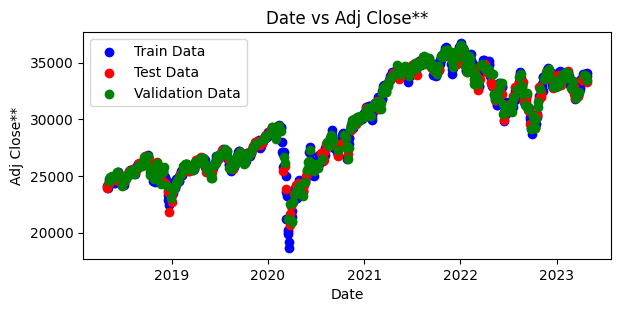

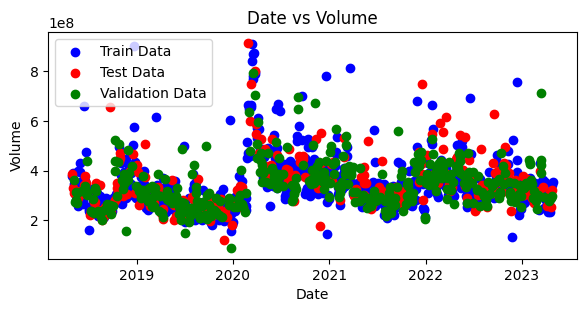

Date vs Open  Date vs High  Date vs Low  Date vs Close*  \
Training Accuracy            1.00          1.00         1.00            1.00   
Test Accuracy                0.99          0.99         0.99            0.99   
Validation Accuracy          0.99          0.99         0.99            0.99   

                     Date vs Adj Close**  Date vs Volume  
Training Accuracy                   1.00            1.00  
Test Accuracy                       0.99            0.25  
Validation Accuracy                 0.99            0.05

In [5]:
acc_df = dict()
for i in range(1,len(data.columns)):
    X_train,X_val,y_train,y_val = train_test_split(data['Date'],data[data.columns[i]],test_size=0.3, random_state=42)
    X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.3, random_state=42)

    pp = Pipeline([('ss',StandardScaler()),("DT",tree.DecisionTreeRegressor())])
    pp.fit(X_train.values.reshape(-1,1),y_train)
    pred=pp.predict(X_test.values.reshape(-1,1))
    val=pp.predict(X_val.values.reshape(-1,1))

    acc_df[f"Date vs {data.columns[i]}"] = [round(pp.score(X_train.values.reshape(-1,1),y_train),2),round(pp.score(X_test.values.reshape(-1,1),y_test),2),round(pp.score(X_val.values.reshape(-1,1),y_val),2)]
    # print(f"Date vs {data.columns[i]}")
    # print(f"Training Accuracy : {round(pp.score(X_train.values.reshape(-1,1),y_train),2)}")
    # print(f"Test Accuracy : {round(pp.score(X_test.values.reshape(-1,1),y_test),2)}")
    # print(f"Validation Accuracy : {round(pp.score(X_val.values.reshape(-1,1),y_val),2)}")
    # print("-------------------------------")

    fig = plt.figure(figsize=(15,10))

    plt.subplot(3,2,i)
    plt.scatter(X_train,y_train,color='b')
    plt.scatter(X_test,y_test,color='r')
    plt.scatter(X_val,y_val,color='g')
    plt.legend(["Train Data","Test Data","Validation Data"])
    plt.title(f"Date vs {data.columns[i]}")
    plt.xlabel("Date")
    plt.ylabel(f"{data.columns[i]}")
    #sns.lineplot(X_test,pred)
    plt.show()
    
display(pd.DataFrame(acc_df,index=['Training Accuracy','Test Accuracy','Validation Accuracy']))